<a href="https://colab.research.google.com/github/abhishek-parashar/bring-back-the-colours/blob/master/Video_colouraziation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='blue'> Video Colorizer </font>**
### Since it would take a lot of time to train the model and run it. We will use pretrained weights for this colab notebook.



---


#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


#◢ Git clone and install Weights

In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2083, done.
remote: Total 2083 (delta 0), reused 0 (delta 0), pack-reused 2083
Receiving objects: 100% (2083/2083), 69.33 MiB | 10.89 MiB/s, done.
Resolving deltas: 100% (936/936), done.


In [2]:
cd DeOldify

/content/DeOldify


#◢ Setup

In [3]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

from os import path

In [4]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 215kB 13.3MB/s 
     |████████████████████████████████| 133kB 29.8MB/s 
     |████████████████████████████████| 1.8MB 50.5MB/s 
     |████████████████████████████████| 7.6MB 53.8MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6084 sha256=5780f2847f2725266a51e75c827203bfec1eacba5056165df9f2d7f72cdffc86
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0


In [5]:
import fastai
from deoldify.visualize import *
from pathlib import Path
torch.backends.cudnn.benchmark=True

In [6]:
!mkdir 'models'
!wget https://www.dropbox.com/s/336vn9y4qwyg9yz/ColorizeVideo_gen.pth?dl=0 -O ./models/ColorizeVideo_gen.pth

--2020-07-04 16:29:56--  https://www.dropbox.com/s/336vn9y4qwyg9yz/ColorizeVideo_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/336vn9y4qwyg9yz/ColorizeVideo_gen.pth [following]
--2020-07-04 16:29:56--  https://www.dropbox.com/s/raw/336vn9y4qwyg9yz/ColorizeVideo_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbb1d3f466a8ad85ab0754ffc32.dl.dropboxusercontent.com/cd/0/inline/A64gw3IUNaaEgva3MW4DhL-ZY78UXicHN3uVfoGD9F1GJJxHD6-Gn-f65HplkUMpNGasFSvzVu1icM1Jz2KspCXHuAazxbYauNgfHxulCp7uEA/file# [following]
--2020-07-04 16:29:57--  https://ucbb1d3f466a8ad85ab0754ffc32.dl.dropboxusercontent.com/cd/0/inline/A64gw3IUNaaEgva3MW4DhL-ZY78UXicHN3uVfoGD9F1GJJxHD6-Gn-f65HplkUMpNGasFSvzVu1icM1Jz2KspCXHuAazxbYauNgf

In [7]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2020-07-04 16:31:17--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2020-07-04 16:31:18 (54.4 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [8]:
colorizer = get_video_colorizer()

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


#◢ Instructions

### source_url
Type in a url hosting a video from YouTube, Imgur, Twitter, Reddit, Vimeo, etc.  Many sources work!  GIFs also work.  Full list here: https://ytdl-org.github.io/youtube-dl/supportedsites.html NOTE: If you want to use your own video, upload it first to a site like YouTube. 

### render_factor
The default value of 21 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the video is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality film in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality videos and inconsistencies (flashy render) will generally be reduced, but the colors may get slightly washed out.

### watermarked
Selected by default, this places a watermark icon of a palette at the bottom left corner of the image.  This is intended to be a standard way to convey to others viewing the image that it is colorized by AI. We want to help promote this as a standard, especially as the technology continues to improve and the distinction between real and fake becomes harder to discern. This palette watermark practice was initiated and lead by the company MyHeritage in the MyHeritage In Color feature (which uses a newer version of DeOldify than what you're using here).

### How to Download a Copy
Simply right click on the displayed video and click "Save video as..."!

## Pro Tips
1. If a video takes a long time to render and you're wondering how well the frames will actually be colorized, you can preview how well the frames will be rendered at each render_factor by using the code at the bottom. Just stop the video rendering by hitting the stop button on the cell, then run that bottom cell under "See how well render_factor values perform on a frame here". It's not perfect and you may still need to experiment a bit especially when it comes to figuring out how to reduce frame inconsistency.  But it'll go a long way in narrowing down what actually works.
2. If videos are taking way too much time for your liking, running the Jupyter notebook VideoColorizer.ipynb on your own machine (with DeOldify installed) will generally be much faster (as long as you have the hardware for it).   

## Troubleshooting
The video player may wind up not showing up, in which case- make sure to wait for the Jupyter cell to complete processing first (the play button will stop spinning).  Then follow these alternative download instructions

1. In the menu to the left, click Files
2. If you don't see the 'DeOldify' folder, click "Refresh"
3. By default, rendered video will be in /DeOldify/video/result/

If a video you downloaded doesn't play, it's probably because the cell didn't complete processing and the video is in a half-finished state.

#◢ Colorize!!

In [11]:
source_url = 'https://www.youtube.com/watch?v=07dfqQ0cvl8' #@param {type:"string"}
render_factor = 21  #@param {type: "slider", min: 5, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    video_path = colorizer.colorize_from_url(source_url, 'video.mp4', render_factor, watermarked=watermarked)
    show_video_in_notebook(video_path)
else:
    print('Provide a video url and try again.')

[youtube] 07dfqQ0cvl8: Downloading webpage
[youtube] 07dfqQ0cvl8: Downloading js player 54668ca9
[youtube] 07dfqQ0cvl8: Downloading js player 54668ca9
[download] Destination: video/source/video.f137.mp4
[download] 100% of 44.60MiB in 00:00
[download] Destination: video/source/video.mp4.f140
[download] 100% of 4.51MiB in 00:00
[ffmpeg] Merging formats into "video/source/video.mp4"
Deleting original file video/source/video.f137.mp4 (pass -k to keep)
Deleting original file video/source/video.mp4.f140 (pass -k to keep)


Video created here: video/result/video.mp4


## See how well render_factor values perform on a frame here

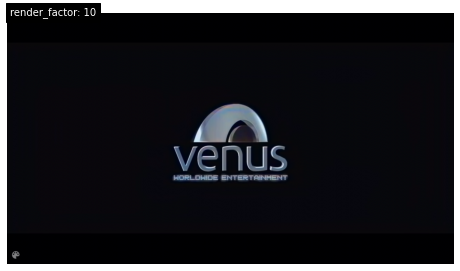

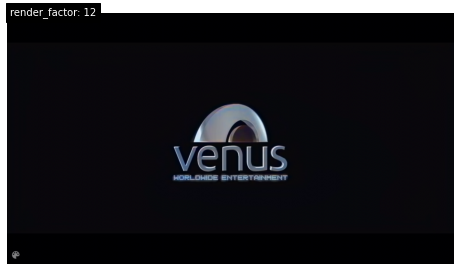

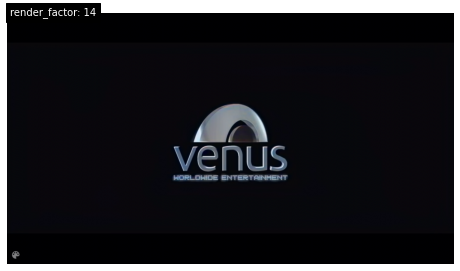

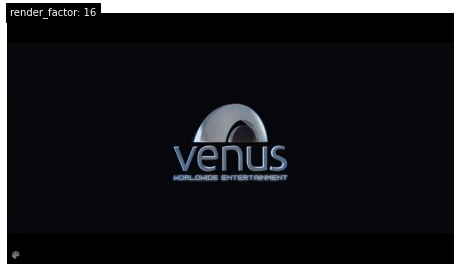

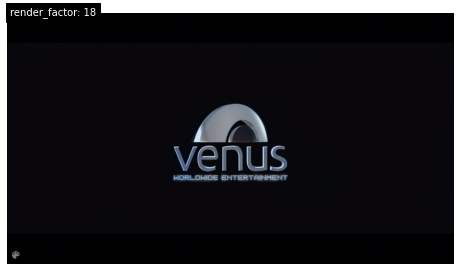

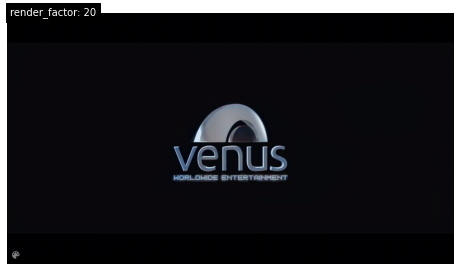

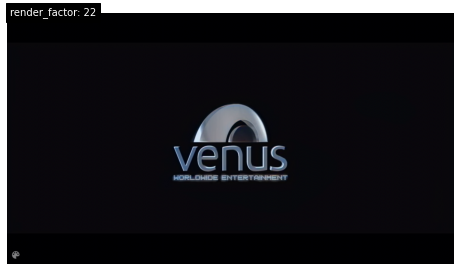

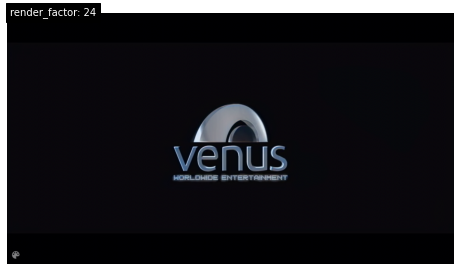

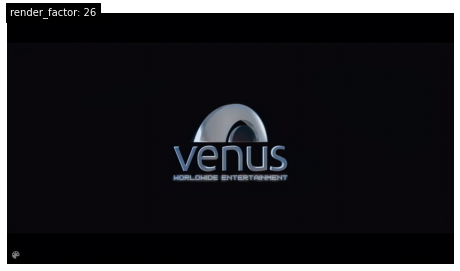

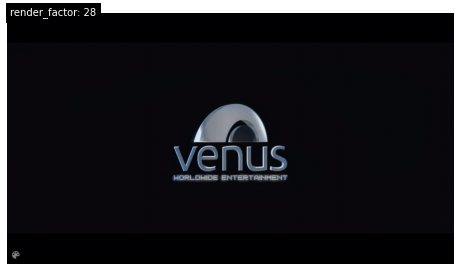

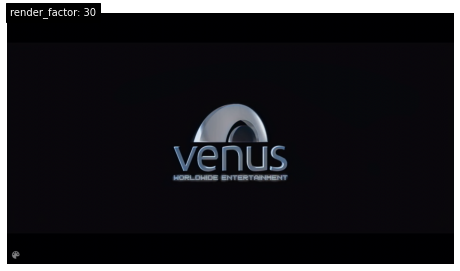

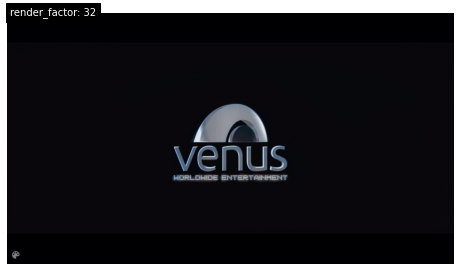

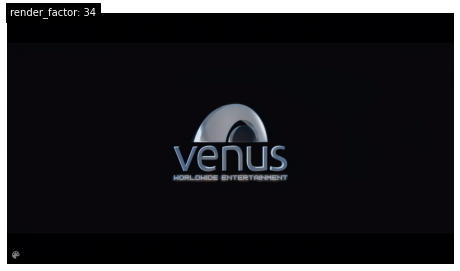

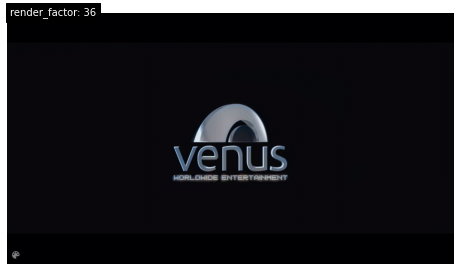

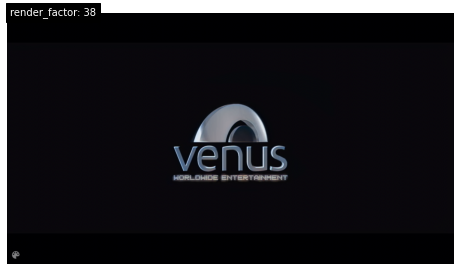

In [13]:
for i in range(10,40,2):
    colorizer.vis.plot_transformed_image('video/bwframes/video/00001.jpg', render_factor=i, display_render_factor=True, figsize=(8,8))

---
#⚙ Recommended video and gif sources 
* [/r/Nickelodeons/](https://www.reddit.com/r/Nickelodeons/)
* [r/silentmoviegifs](https://www.reddit.com/r/silentmoviegifs/)
* https://twitter.com/silentmoviegifs 